In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

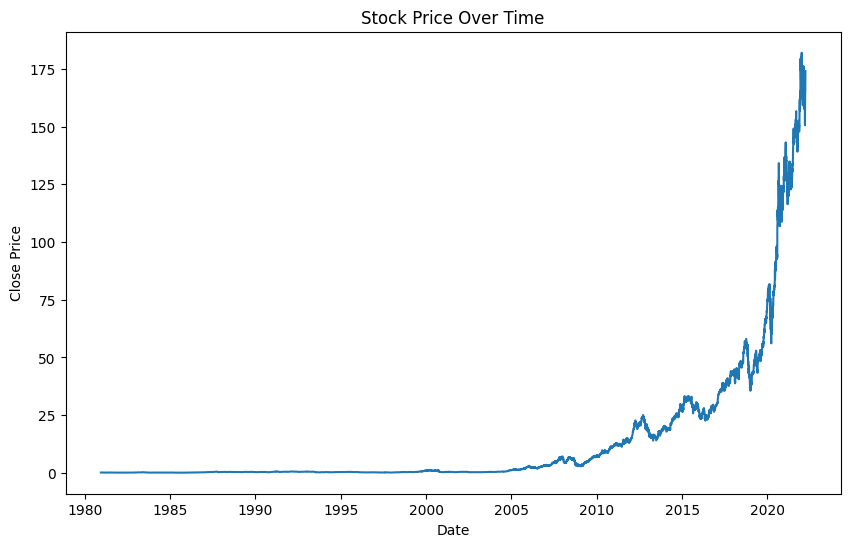

In [ ]:
# Make sure to import pandas
import pandas as pd

# Load dataset
data = pd.read_csv('/content/sample_data/AAPL.csv', usecols=['Date', 'Close'])
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Plot the closing price
import matplotlib.pyplot as plt #This import could be moved to the top of your file as well
plt.figure(figsize=(10,6))
plt.plot(data['Close'])
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [ ]:
# Prepare data for scaling and split into train and test sets
def prepare_data(data, train_ratio=0.8):
    # Scale data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

    # Define training and test data sizes
    train_size = int(len(scaled_data) * train_ratio)
    train_data = scaled_data[:train_size]
    test_data = scaled_data[train_size:]

    return train_data, test_data, scaler

# Usage
train_data, test_data, scaler = prepare_data(data)


In [ ]:
# Function to create sequences and reshape for RNN
def prepare_sequences(data, seq_length=60):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    # Convert to numpy arrays and reshape for RNN
    x = np.array(x).reshape(-1, seq_length, 1)
    y = np.array(y)
    return x, y

# Choose sequence length (e.g., 60 days)
sequence_length = 60

# Prepare training and test sequences
x_train, y_train = prepare_sequences(train_data, sequence_length)
x_test, y_test = prepare_sequences(test_data, sequence_length)



USING LSTM

In [ ]:

# Function to build and compile an LSTM model
def build_lstm_model(input_shape, units=50):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=units))
    model.add(Dense(units=1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to train the model
def train_model(model, x_train, y_train, epochs=10, batch_size=32):
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)
    return history

# Build, compile, and train the model
input_shape = (x_train.shape[1], 1)
model = build_lstm_model(input_shape)
history = train_model(model, x_train, y_train)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - loss: 1.4292e-04
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - loss: 2.3339e-06
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - loss: 2.8350e-06
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - loss: 2.5959e-06
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - loss: 2.1055e-06
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - loss: 2.1520e-06
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 2.1264e-06
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - loss: 2.3366e-06
Epoch 9/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - loss: 3.6416e-06
Epoch 10/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - loss: 1.9188e-06


In [ ]:
# Prepare data for scaling and split into train and test sets
def prepare_data(data, train_ratio=0.8):
    # Scale data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

    # Define training and test data sizes
    train_size = int(len(scaled_data) * train_ratio)  # Calculate train_size
    train_data = scaled_data[:train_size]
    test_data = scaled_data[train_size:]

    return train_data, test_data, scaler, train_size # Return train_size along with other values

# Usage
train_data, test_data, scaler, train_size = prepare_data(data) # Store train_size when calling the function


from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to make predictions and inverse scale
# ... (rest of the code remains the same) ...

# Prepare data for plotting and evaluation
actual_prices = scaler.inverse_transform(test_data[sequence_length:])
dates = data.index[train_size + sequence_length:]  # Now train_size is accessible

# Plot results
# ... (rest of the code remains the same) ...

USING GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense # Import GRU and Dense

# Function to build and compile a GRU model
def build_gru_model(input_shape, units=50):
    model = Sequential()
    model.add(GRU(units=units, return_sequences=True, input_shape=input_shape))
    model.add(GRU(units=units))
    model.add(Dense(units=1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to train the model
def train_model(model, x_train, y_train, epochs=10, batch_size=32):
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)
    return history

# Build, compile, and train the GRU model
input_shape = (x_train.shape[1], 1)
gru_model = build_gru_model(input_shape)
history = train_model(gru_model, x_train, y_train)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 22s 72ms/step - loss: 5.5540e-05
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - loss: 1.2830e-06
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - loss: 1.7624e-06
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - loss: 1.4173e-06
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - loss: 1.4836e-06
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - loss: 1.0252e-06
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - loss: 1.3486e-06
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - loss: 2.5815e-06
Epoch 9/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - loss: 9.6120e-07
Epoch 10/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - loss: 8.9939e-07


64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step


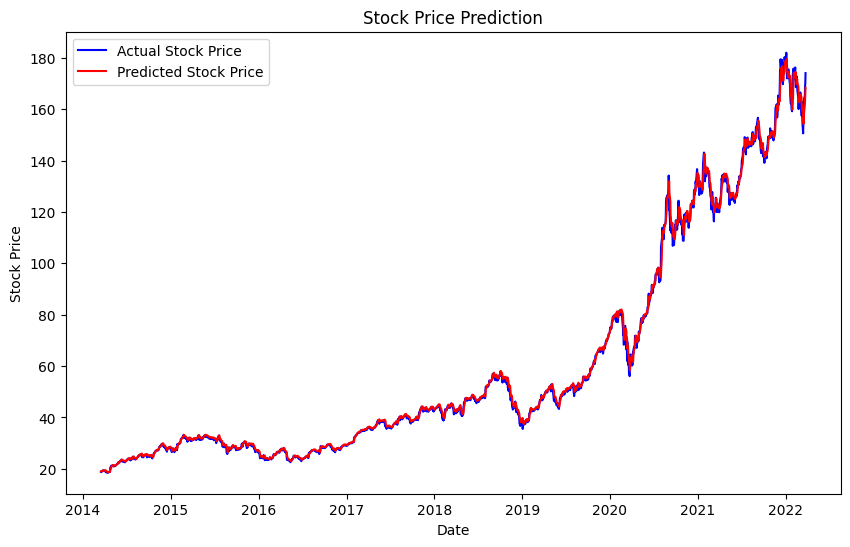

Mean Squared Error: 2.66434916837746


In [ ]:
# Function to make predictions and inverse transform them
def make_predictions(model, x_test, scaler):
    predictions = model.predict(x_test)
    return scaler.inverse_transform(predictions)

# Function to plot actual vs predicted stock prices
def plot_predictions(data, train_size, sequence_length, test_data, predictions, scaler):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index[train_size + sequence_length:], scaler.inverse_transform(test_data[sequence_length:]), color='blue', label='Actual Stock Price')
    plt.plot(data.index[train_size + sequence_length:], predictions, color='red', label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Function to evaluate the model
def evaluate_model(test_data, predictions, scaler, sequence_length):
    actual_prices = scaler.inverse_transform(test_data[sequence_length:])
    mse = mean_squared_error(actual_prices, predictions)
    print(f'Mean Squared Error: {mse}')
    return mse

# Make predictions
predictions = make_predictions(gru_model, x_test, scaler)

# Plot predictions vs actual data
plot_predictions(data, train_size, sequence_length, test_data, predictions, scaler)

# Evaluate the model
mse = evaluate_model(test_data, predictions, scaler, sequence_length)



Bidirectional RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

# Function to build and compile a Bidirectional LSTM model
def build_bidirectional_lstm_model(input_shape, units=50):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=units, return_sequences=True), input_shape=input_shape))
    model.add(Bidirectional(LSTM(units=units)))
    model.add(Dense(units=1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to train the model
def train_model(model, x_train, y_train, epochs=10, batch_size=32):
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)
    return history

# Build, compile, and train the Bidirectional LSTM model
input_shape = (x_train.shape[1], 1)
bidirectional_model = build_bidirectional_lstm_model(input_shape)
history = train_model(bidirectional_model, x_train, y_train)



Epoch 1/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 40s 108ms/step - loss: 8.7085e-05
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 25s 96ms/step - loss: 2.1416e-06
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 39s 90ms/step - loss: 1.7489e-06
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 43s 99ms/step - loss: 2.2252e-06
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - loss: 2.0420e-06
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - loss: 1.9471e-06
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 24s 93ms/step - loss: 1.8669e-06
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - loss: 1.6460e-06
Epoch 9/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - loss: 1.7060e-06
Epoch 10/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 40s 92ms/step - loss: 1.1770e-06


Mean Squared Error: 437.3638247465538
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


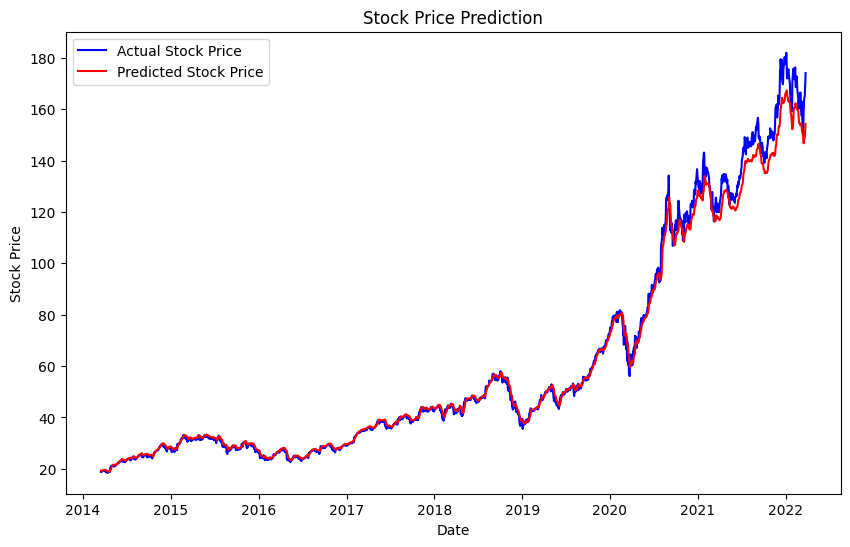

Mean Squared Error: 13.972319684470587


In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to make predictions and inverse transform them
def make_predictions(model, x_test, scaler):
    predictions = model.predict(x_test)
    return scaler.inverse_transform(predictions)

# Function to plot actual vs. predicted stock prices
def plot_predictions(data, train_size, sequence_length, test_data, predictions, scaler):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index[train_size + sequence_length:], scaler.inverse_transform(test_data[sequence_length:]), color='blue', label='Actual Stock Price')
    plt.plot(data.index[train_size + sequence_length:], predictions, color='red', label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Function to evaluate the model
def evaluate_model(test_data, predictions, scaler, sequence_length):
    actual_prices = scaler.inverse_transform(test_data[sequence_length:])
    mse = mean_squared_error(actual_prices, predictions)
    print(f'Mean Squared Error: {mse}')
    return mse

# Make predictions
predictions = make_predictions(bidirectional_model, x_test, scaler)

# Plot predictions vs. actual data
plot_predictions(data, train_size, sequence_length, test_data, predictions, scaler)

# Evaluate the model
mse = evaluate_model(test_data, predictions, scaler, sequence_length)



Vanilla RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Function to build and compile a Vanilla RNN model
def build_vanilla_rnn_model(input_shape, units=50):
    model = Sequential()
    model.add(SimpleRNN(units=units, return_sequences=True, input_shape=input_shape))
    model.add(SimpleRNN(units=units))
    model.add(Dense(units=1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to train the model
def train_model(model, x_train, y_train, epochs=10, batch_size=32):
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)
    return history

# Build, compile, and train the Vanilla RNN model
input_shape = (x_train.shape[1], 1)
vanilla_rnn_model = build_vanilla_rnn_model(input_shape)
history = train_model(vanilla_rnn_model, x_train, y_train)



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - loss: 0.0012
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - loss: 4.7454e-06
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 4.0733e-06
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 4.1167e-06
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 2.6125e-06
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 2.1746e-06
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 2.5911e-06
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 1.8296e-06
Epoch 9/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 1.3185e-06
Epoch 10/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 1.4166e-06


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


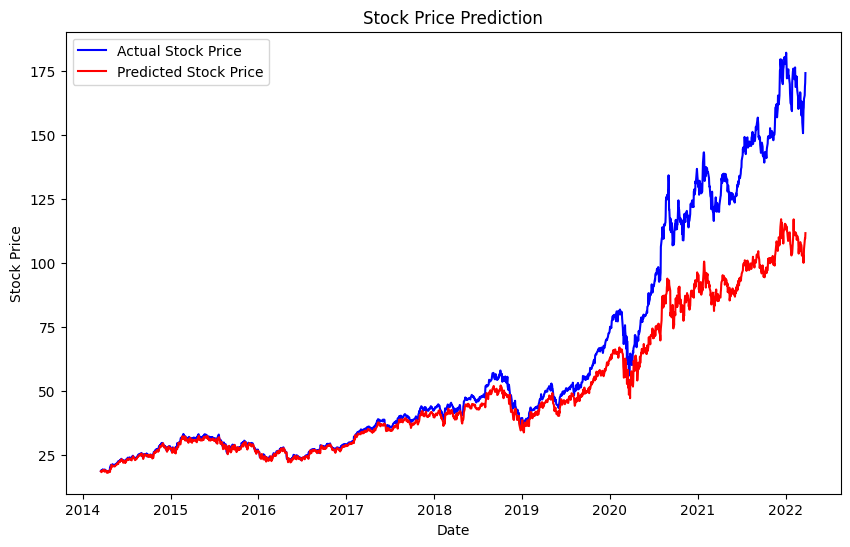

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to make predictions and inverse transform them
def make_predictions(model, x_test, scaler):
    predictions = model.predict(x_test)
    return scaler.inverse_transform(predictions)

# Function to plot actual vs. predicted stock prices
def plot_predictions(data, train_size, sequence_length, test_data, predictions, scaler):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index[train_size + sequence_length:], scaler.inverse_transform(test_data[sequence_length:]), color='blue', label='Actual Stock Price')
    plt.plot(data.index[train_size + sequence_length:], predictions, color='red', label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Function to evaluate the model
def evaluate_model(test_data, predictions, scaler, sequence_length):
    actual_prices = scaler.inverse_transform(test_data[sequence_length:])
    mse = mean_squared_error(actual_prices, predictions)
    print(f'Mean Squared Error: {mse}')
    return mse

# Make predictions
predictions = make_predictions(vanilla_rnn_model, x_test, scaler)

# Plot predictions vs. actual data
plot_predictions(data, train_size, sequence_length, test_data, predictions, scaler)

# Evaluate the model
mse = evaluate_model(test_data, predictions, scaler, sequence_length)

